In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('for_pca_transcript_raw_data.csv', index_col =0 )

In [4]:
df.head()

Sample_ID  ENST00000624431  ENST00000424215  ENST00000511072  \
0  IGIB1130536264              0.0              0.0              0.0   
1  IGIB1130923527            100.0              0.0              0.0   
2  IGIB1130492220            100.0              0.0              0.0   
3  IGIB1130661232              0.0              0.0              0.0   
4  IGIB1130493563            100.0              0.0              0.0   

   ENST00000607632  ENST00000378391  ENST00000514189  ENST00000270722  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   ENST00000512462  ENST00000463591  ...  ENST00000387441  ENST00000387449  \
0              0.0              0.0  ...              0.0              0.0   
1              0.0              0.0  ...              0.0            100.0   
2              0.0              0.0  ...            100.0            100.0   
3              0.0              0.0  ...              0.0              0.0   
4              0.0              0.0  ...            100.0            100.0   

   ENST00000387456  ENST00000361567  ENST00000361681  ENST00000387459  \
0              0.0              0.0            100.0            100.0   
1              0.0              0.0            100.0              0.0   
2            100.0              0.0            100.0            100.0   
3              0.0              0.0            100.0              0.0   
4            100.0              0.0            100.0            100.0   

   ENST00000361789  ENST00000387460  ENST00000387461  Group  
0        97.458370              0.0              0.0   Mild  
1        99.386503              0.0              0.0   Mild  
2       100.000000            100.0              0.0   Mild  
3        97.808940              0.0              0.0   Mild  
4       100.000000            100.0            100.0   Mild  

[5 rows x 252837 columns]

In [9]:
df_ = df.drop(['Sample_ID','Group'], axis = 1)

In [10]:
df_

ENST00000624431  ENST00000424215  ENST00000511072  ENST00000607632  \
0               0.0              0.0              0.0              0.0   
1             100.0              0.0              0.0              0.0   
2             100.0              0.0              0.0              0.0   
3               0.0              0.0              0.0              0.0   
4             100.0              0.0              0.0              0.0   
..              ...              ...              ...              ...   
16            100.0              0.0              0.0              0.0   
17            100.0              0.0              0.0              0.0   
18            100.0              0.0              0.0              0.0   
19              0.0              0.0              0.0              0.0   
20            100.0              0.0              0.0              0.0   

    ENST00000378391  ENST00000514189  ENST00000270722  ENST00000512462  \
0               0.0              0.0              0.0              0.0   
1               0.0              0.0              0.0              0.0   
2               0.0              0.0              0.0              0.0   
3               0.0              0.0              0.0              0.0   
4               0.0              0.0              0.0              0.0   
..              ...              ...              ...              ...   
16              0.0              0.0              0.0              0.0   
17              0.0              0.0              0.0              0.0   
18              0.0              0.0              0.0              0.0   
19              0.0              0.0              0.0              0.0   
20              0.0              0.0              0.0              0.0   

    ENST00000463591  ENST00000509860  ...  ENST00000361381  ENST00000387441  \
0               0.0              0.0  ...        96.589260              0.0   
1               0.0              0.0  ...        93.396226              0.0   
2               0.0              0.0  ...        99.056604            100.0   
3               0.0              0.0  ...       100.000000              0.0   
4               0.0              0.0  ...       100.000000            100.0   
..              ...              ...  ...              ...              ...   
16              0.0              0.0  ...         0.000000              0.0   
17              0.0              0.0  ...       100.000000              0.0   
18              0.0              0.0  ...       100.000000            100.0   
19              0.0              0.0  ...        99.854862            100.0   
20              0.0              0.0  ...       100.000000            100.0   

    ENST00000387449  ENST00000387456  ENST00000361567  ENST00000361681  \
0               0.0              0.0              0.0            100.0   
1             100.0              0.0              0.0            100.0   
2             100.0            100.0              0.0            100.0   
3               0.0              0.0              0.0            100.0   
4             100.0            100.0              0.0            100.0   
..              ...              ...              ...              ...   
16              0.0              0.0              0.0              0.0   
17            100.0            100.0              0.0            100.0   
18            100.0            100.0              0.0            100.0   
19            100.0            100.0              0.0            100.0   
20            100.0            100.0            100.0            100.0   

    ENST00000387459  ENST00000361789  ENST00000387460  ENST00000387461  
0             100.0        97.458370              0.0              0.0  
1               0.0        99.386503              0.0              0.0  
2             100.0       100.000000            100.0              0.0  
3               0.0        97.808940              0.0              0.0  
4             100.0    

In [27]:
def pca_2d(df):
    df = df.reset_index()
    df = df.drop(['index'], axis =1 )
    df_pca = df.drop(['Sample_ID','Group'], axis = 1)
    scaler = StandardScaler()
    df_pca = scaler.fit_transform(df_pca)
    pca = PCA(n_components =2)
    df_pca = pca.fit_transform(df_pca)
    df_pca = pd.DataFrame(data = df_pca, columns = ['PC1','PC2'])
    df_pca = pd.concat([df_pca,df['Group']], axis = 1)
    palette = {'Mild': '#3498db', 'Moderate': '#2ecc71', 'Severe': '#e74c3c'}
    sns.set(style="whitegrid")
    plt.figure(dpi = 600, figsize=(8, 5))
    ax = sns.scatterplot(data=df_pca, x='PC1', y='PC2', 
                         hue='Group', palette=palette, 
                         s=100, alpha=0.8, edgecolor='k')

    plt.title('Principal Component Analysis (PCA) of Transcript', 
              fontsize=18, fontweight='bold')
    plt.xlabel('PC1', fontsize=14)
    plt.ylabel('PC2', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    legend = plt.legend(title='Group', fontsize=12, title_fontsize=10)
    legend.get_title().set_fontweight('bold')

    sns.despine(trim=True, offset=10, left=True, bottom=True)
    plt.grid(True, linestyle='--', alpha=0.7)

    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    for group, color in palette.items():
        group_data = df_pca[df_pca['Group'] == group]
        plt.scatter(group_data['PC1'], group_data['PC2'], label=group, 
                    color=color, s=100, alpha=0.8, edgecolor='k', linewidths=2)

    # Add a dynamic title
    plt.figtext(0.52, 0.82, 'Cluster Analysis of Transcript Coverage', 
                fontsize=12, ha='center', va='center')

    # Add subtle background color for a soothing effect
    plt.fill_between([-10, 10], [-10, 10], color='lightgray', alpha=0.3)

    # Show the plot
    plt.tight_layout()
    plt.show()
    
    return df_pca
    
    

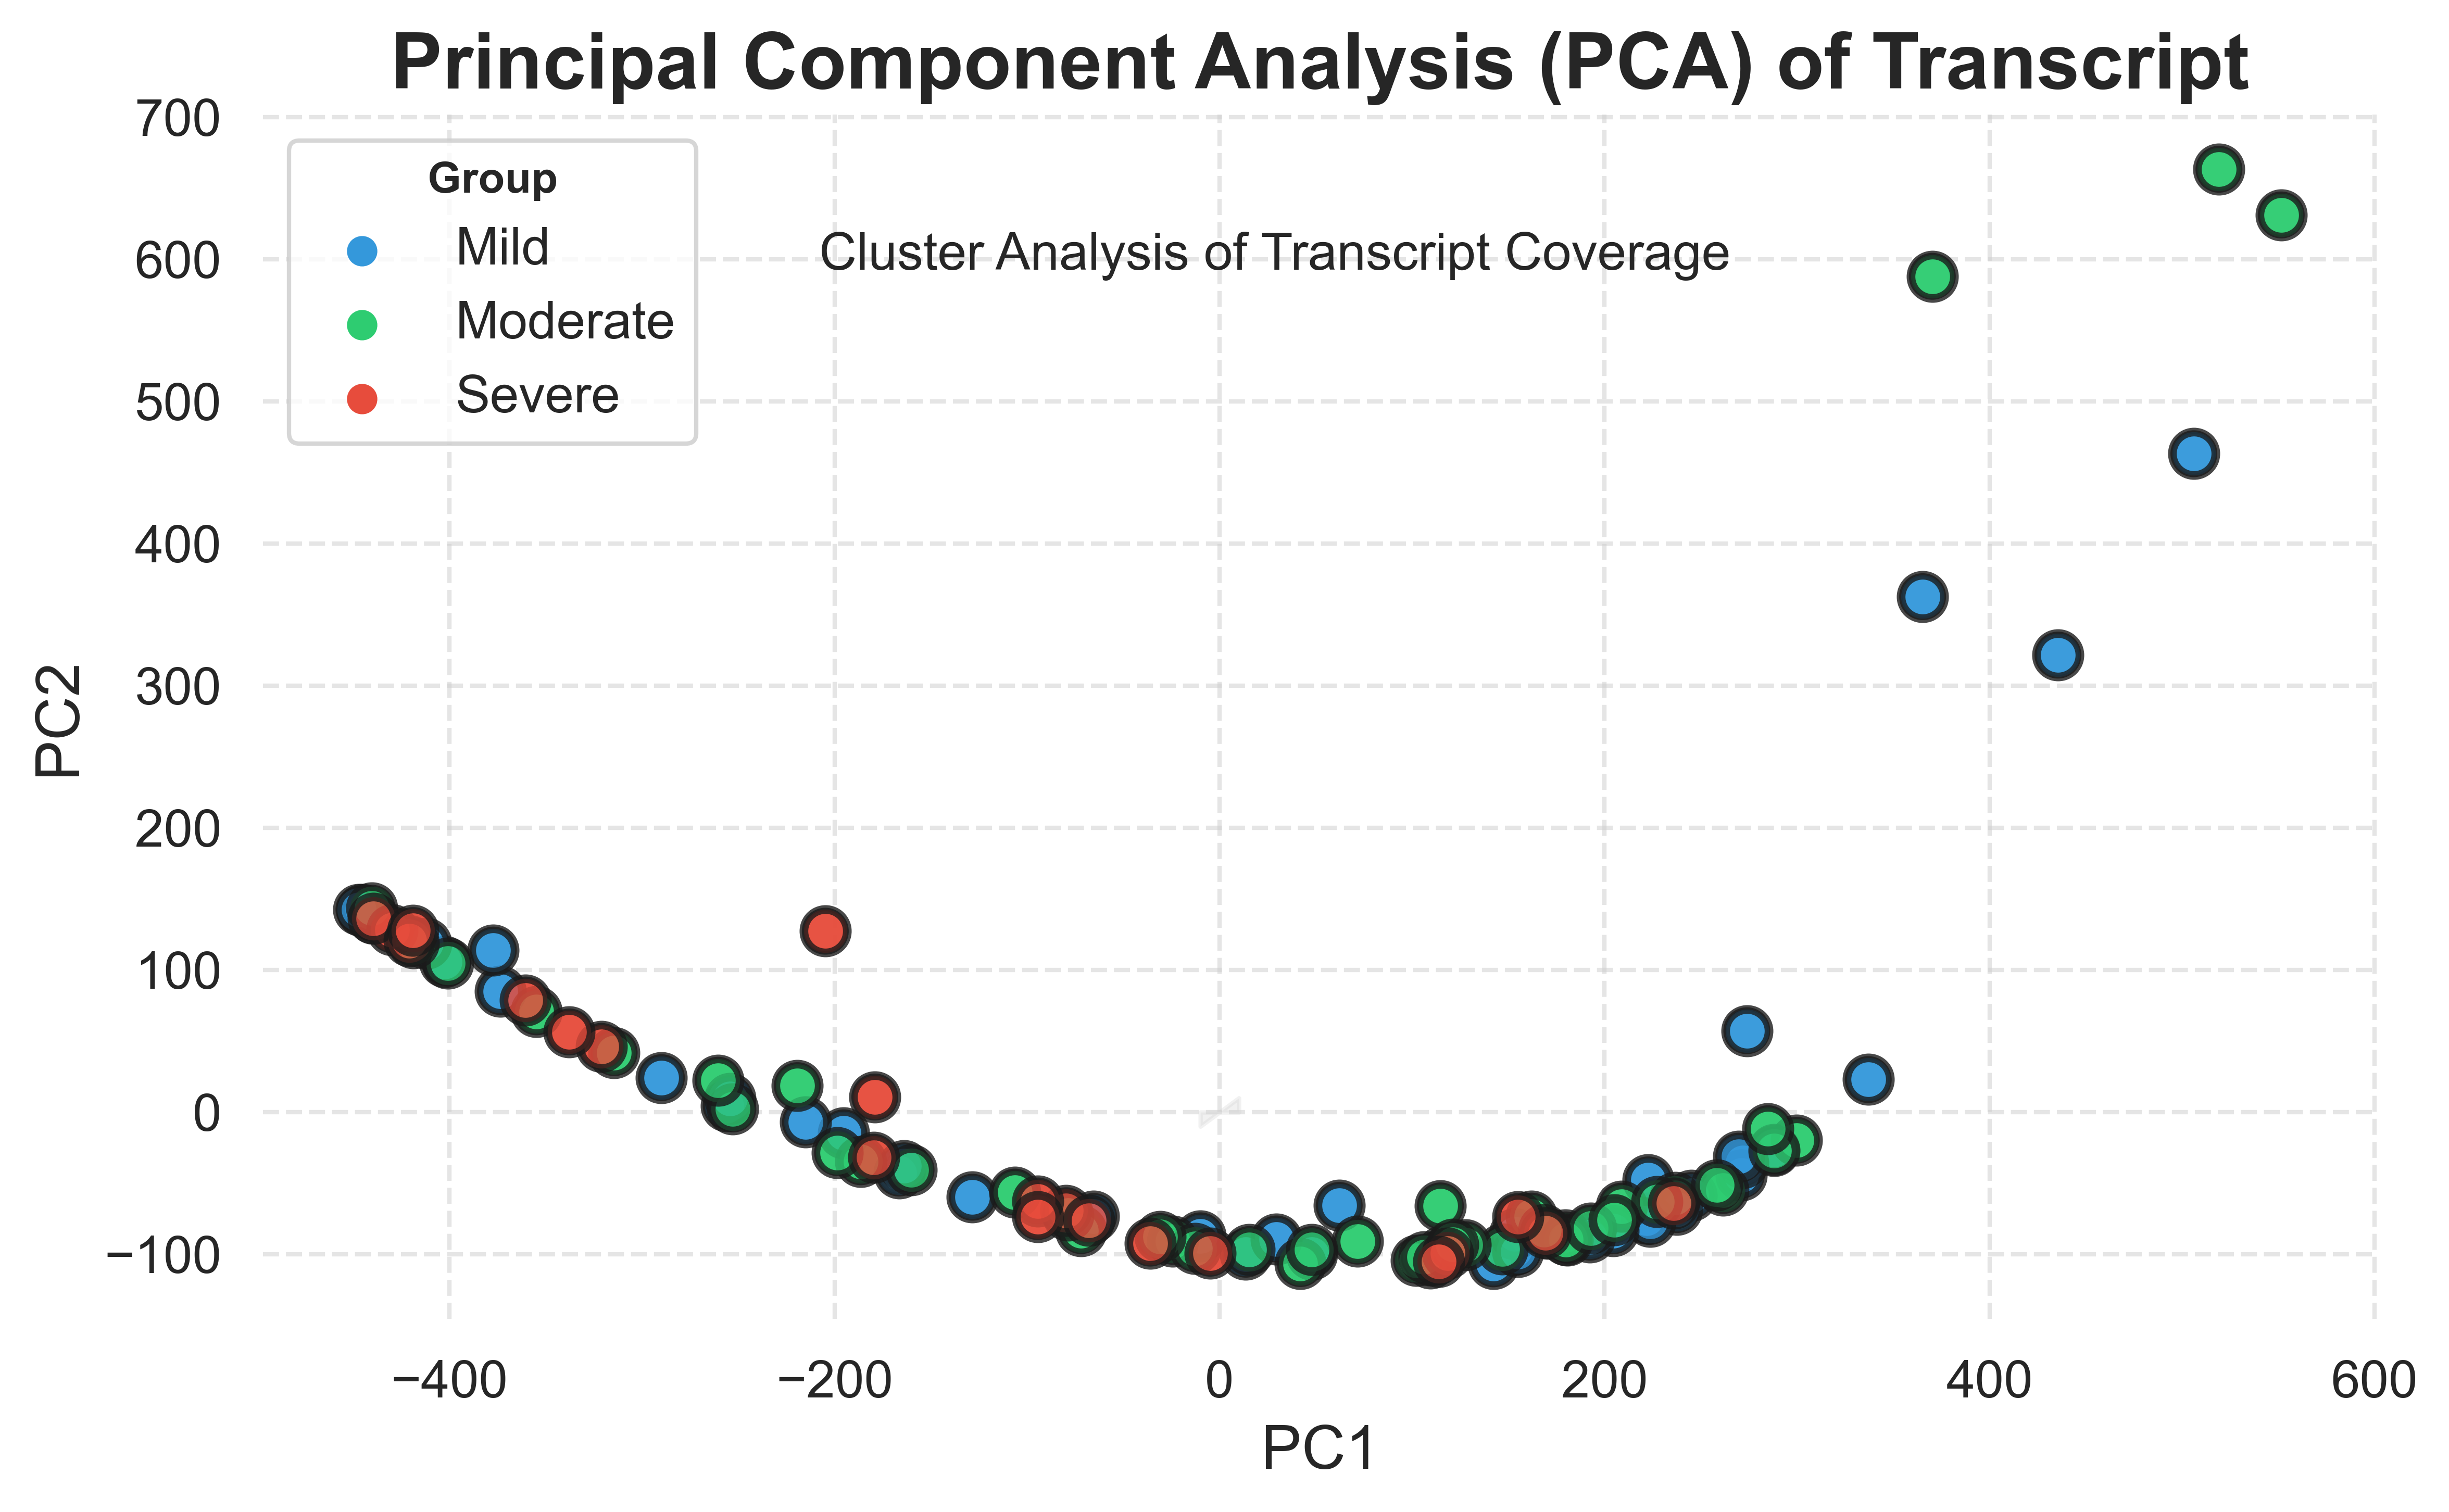

PC1         PC2   Group
0   -290.000090   24.294723    Mild
1   -256.332005    4.582093    Mild
2   -166.537673  -42.815223    Mild
3   -373.593145   84.860944    Mild
4     -9.983086  -86.965712    Mild
..          ...         ...     ...
107  -94.480613  -73.429663  Severe
108 -337.837445   56.443777  Severe
109 -360.501580   78.886507  Severe
110 -418.962332  127.803404  Severe
111 -204.842345  127.321085  Severe

[112 rows x 3 columns]

In [28]:
pca_2d(df)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA

def pca_2d_with_scaling(df):
    df = df.reset_index()
    df = df.drop(['index'], axis =1 )
    # Define a list of scaling methods and their names
    scalers = [
        (StandardScaler(), 'Standard Scaler'),
        (MinMaxScaler(), 'Min-Max Scaler'),
        (RobustScaler(), 'Robust Scaler'),
        (MaxAbsScaler(), 'Max-Abs Scaler'),
        (QuantileTransformer(output_distribution='normal'), 'Quantile Transformer'),
        (PowerTransformer(method='yeo-johnson'), 'Yeo-Johnson Power Transformer')
    ]

    # Initialize an empty list to store the scaled DataFrames
    list_scaled_data = []

    for scaler, scaler_name in scalers:
        df_pca = df.drop(['Sample_ID', 'Group'], axis=1)
        feature_names = df_pca.columns  # Store the feature names for later use
        df_pca = scaler.fit_transform(df_pca)
        pca = PCA(n_components=2)
        df_pca = pca.fit_transform(df_pca)
        df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
        df_pca = pd.concat([df_pca, df['Group']], axis=1)
        
        # Calculate the feature contributions to PC1 and PC2
        pca_components = pca.components_
        pc1_contributions = pca_components[0]
        pc2_contributions = pca_components[1]

        # Get the indices of the top 50 contributing features for PC1 and PC2
        top_50_pc1_indices = np.argsort(np.abs(pc1_contributions))[::-1][:50]
        top_50_pc2_indices = np.argsort(np.abs(pc2_contributions))[::-1][:50]

        # Create lists of the top contributing feature names for PC1 and PC2
        top_50_pc1_features = [feature_names[i] for i in top_50_pc1_indices]
        top_50_pc2_features = [feature_names[i] for i in top_50_pc2_indices]

        palette = {'Mild': '#3498db', 'Moderate': '#2ecc71', 'Severe': '#e74c3c'}
        sns.set(style="whitegrid")
        plt.figure(dpi=600, figsize=(8, 5))
        ax = sns.scatterplot(data=df_pca, x='PC1', y='PC2', 
                             hue='Group', palette=palette, 
                             s=100, alpha=0.8, edgecolor='k')

        plt.title(f'PCA of Transcript Coverage\n(Scaled using {scaler_name})', 
                  fontsize=18, fontweight='bold')
        plt.xlabel('PC1', fontsize=14)
        plt.ylabel('PC2', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        legend = plt.legend(title='Group', fontsize=12, title_fontsize=10)
        legend.get_title().set_fontweight('bold')

        sns.despine(trim=True, offset=10, left=True, bottom=True)
        plt.grid(True, linestyle='--', alpha=0.7)

        ax.xaxis.grid(True, linestyle='--', alpha=0.5)
        ax.yaxis.grid(True, linestyle='--', alpha=0.5)
        for group, color in palette.items():
            group_data = df_pca[df_pca['Group'] == group]
            plt.scatter(group_data['PC1'], group_data['PC2'], label=group, 
                        color=color, s=100, alpha=0.8, edgecolor='k', linewidths=2)

        # Add a dynamic title
        plt.figtext(0.52, 0.82, 'Cluster Analysis of Transcript Coverage', 
                    fontsize=12, ha='center', va='center')

        # Add subtle background color for a soothing effect
        plt.fill_between([-10, 10], [-10, 10], color='lightgray', alpha=0.3)

        # Show the plot
        plt.tight_layout()
        plt.show()

        # Print scaling strategy used
        print(f"Scaling Strategy: {scaler_name}")
        print(f"Top 50 Features Contributing to PC1: {top_50_pc1_features}")
        print(f"Top 50 Features Contributing to PC2: {top_50_pc2_features}")
        print("\n")

        # Append the scaled DataFrame to the list
        list_scaled_data.append(df_pca)

    # Return the list of scaled DataFrames
    return list_scaled_data


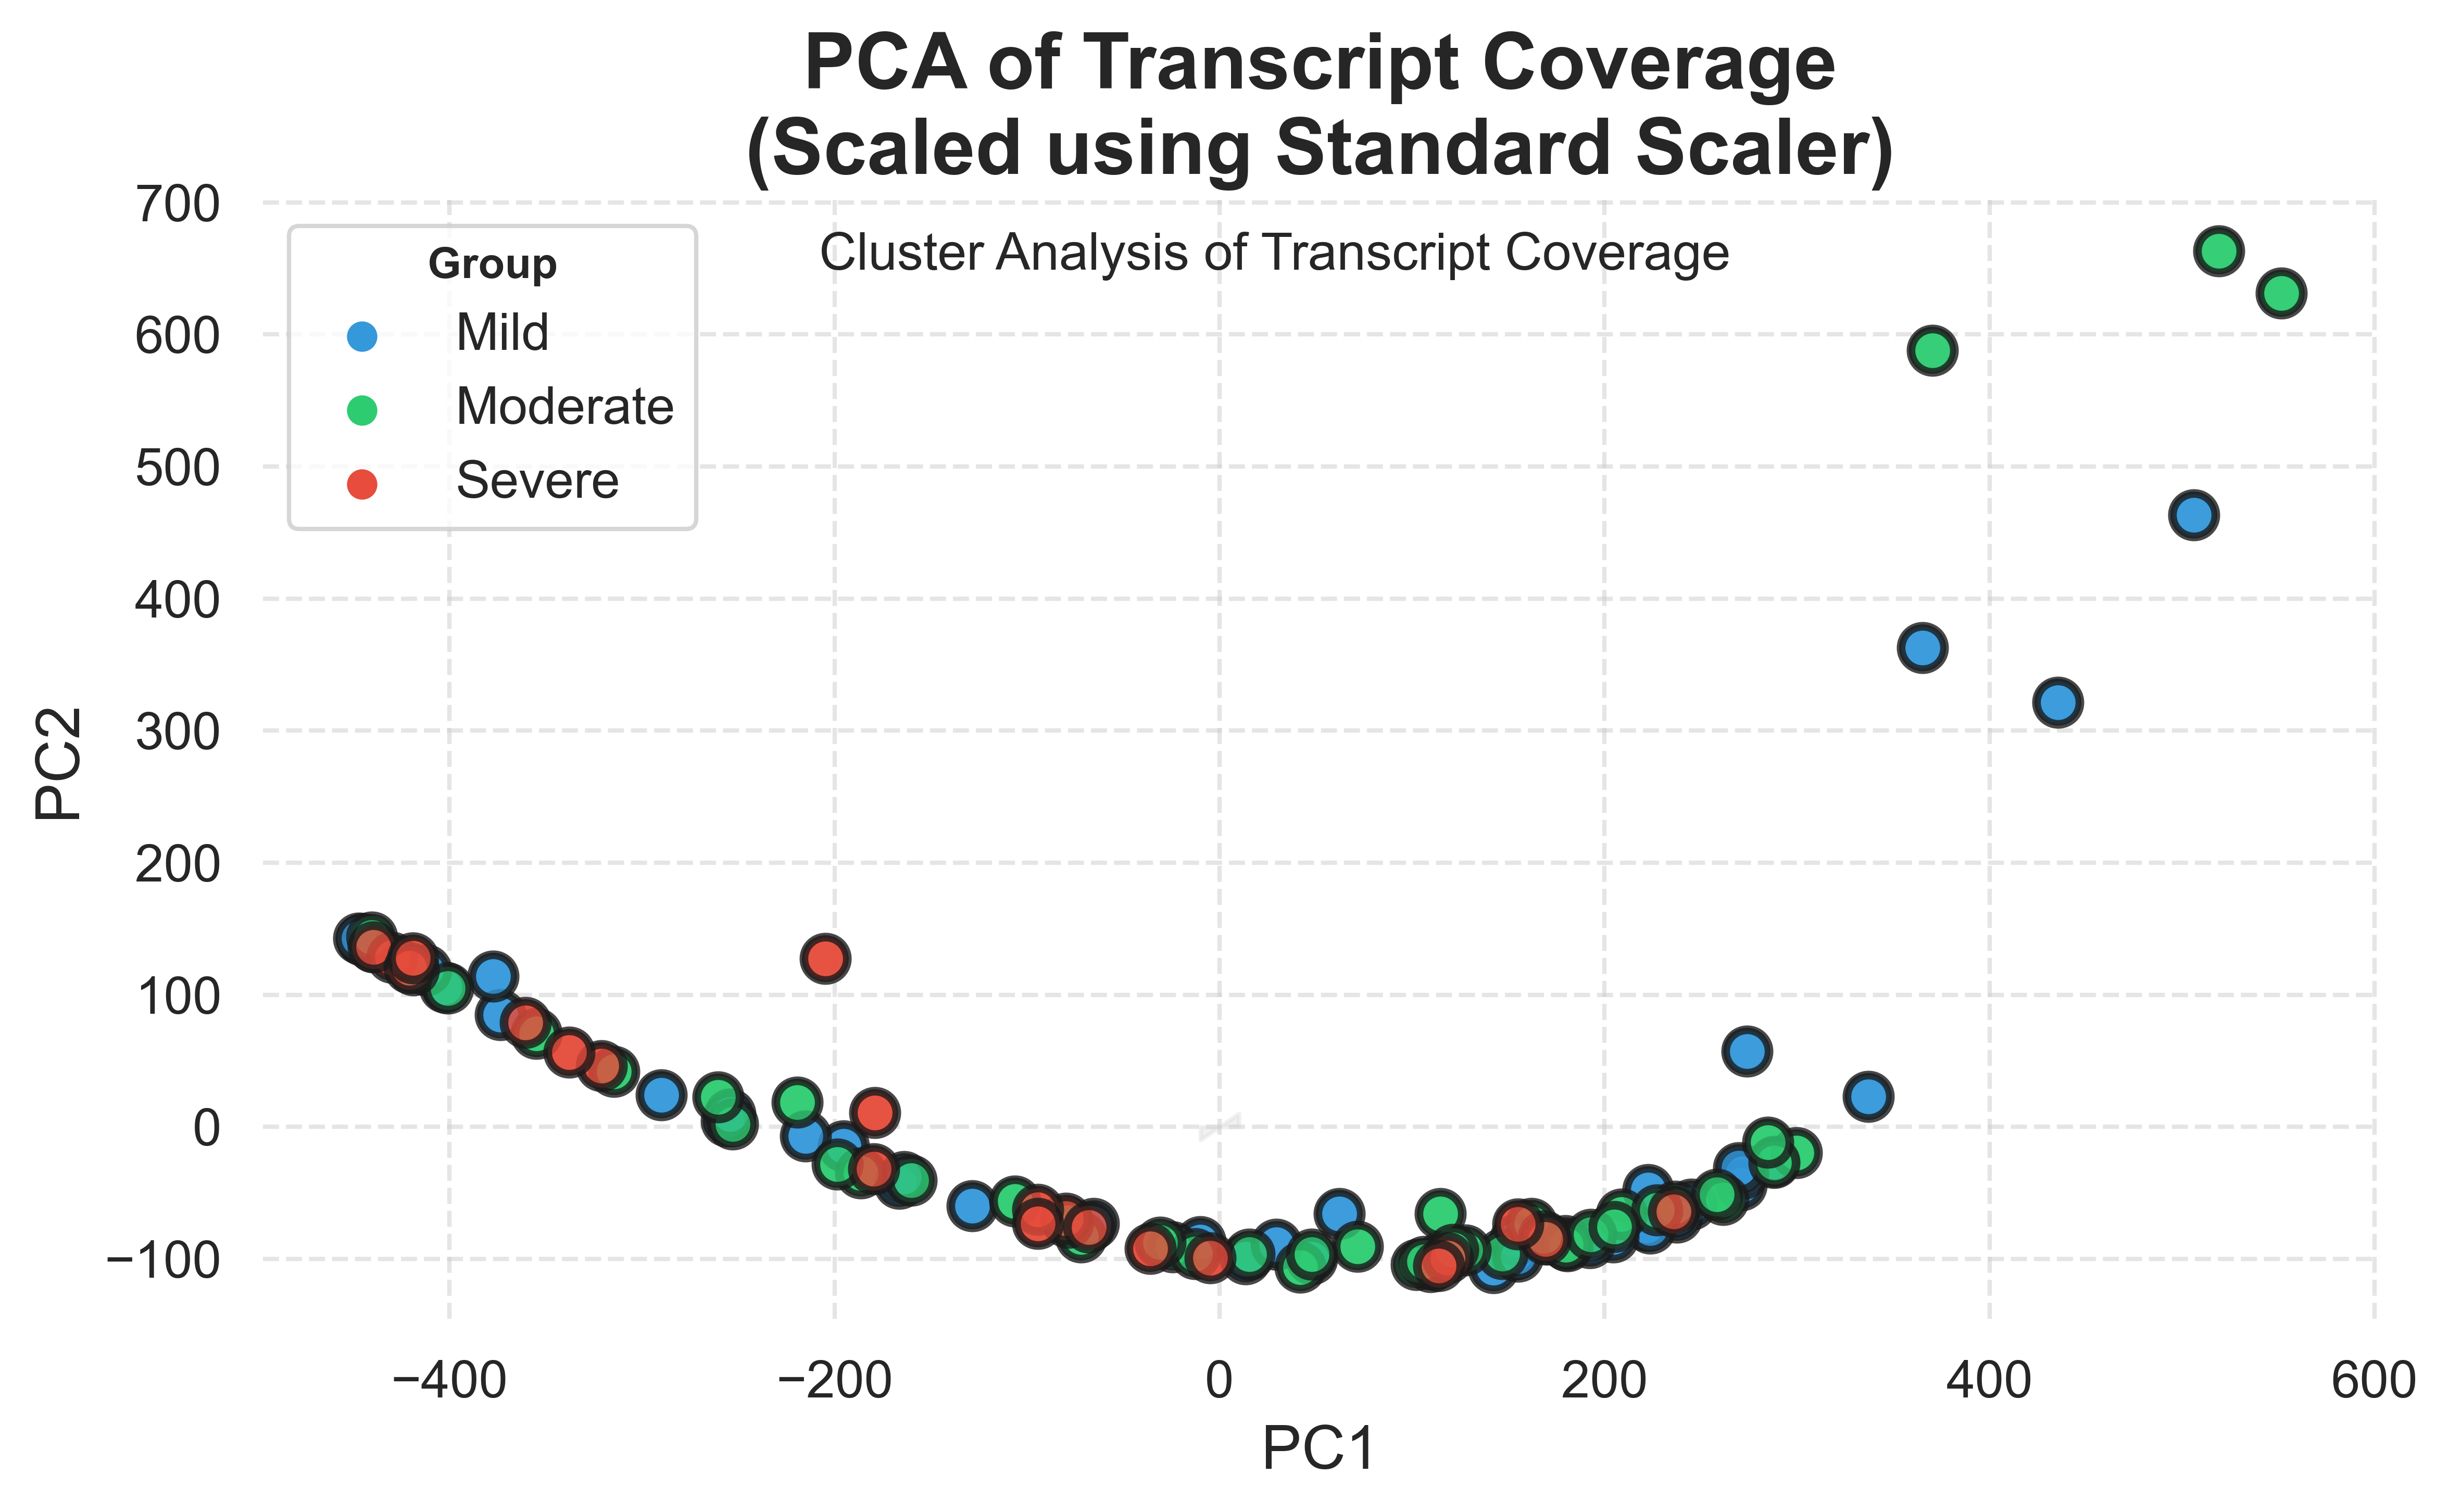

Scaling Strategy: Standard Scaler
Top 50 Features Contributing to PC1: ['ENST00000673706', 'ENST00000681193', 'ENST00000680815', 'ENST00000555759', 'ENST00000687817', 'ENST00000692458', 'ENST00000644140', 'ENST00000686600', 'ENST00000689401', 'ENST00000687972', 'ENST00000687427', 'ENST00000690139', 'ENST00000646534', 'ENST00000262554', 'ENST00000686799', 'ENST00000334538', 'ENST00000331343', 'ENST00000612472', 'ENST00000349485', 'ENST00000677548', 'ENST00000415005', 'ENST00000689423', 'ENST00000482632', 'ENST00000693147', 'ENST00000535398', 'ENST00000559424', 'ENST00000488118', 'ENST00000562258', 'ENST00000459908', 'ENST00000418678', 'ENST00000524965', 'ENST00000677609', 'ENST00000678980', 'ENST00000677244', 'ENST00000679246', 'ENST00000678625', 'ENST00000678287', 'ENST00000470443', 'ENST00000676523', 'ENST00000394583', 'ENST00000489606', 'ENST00000546714', 'ENST00000282344', 'ENST00000677006', 'ENST00000698500', 'ENST00000478110', 'ENST00000397977', 'ENST00000677163', 'ENST00000372862

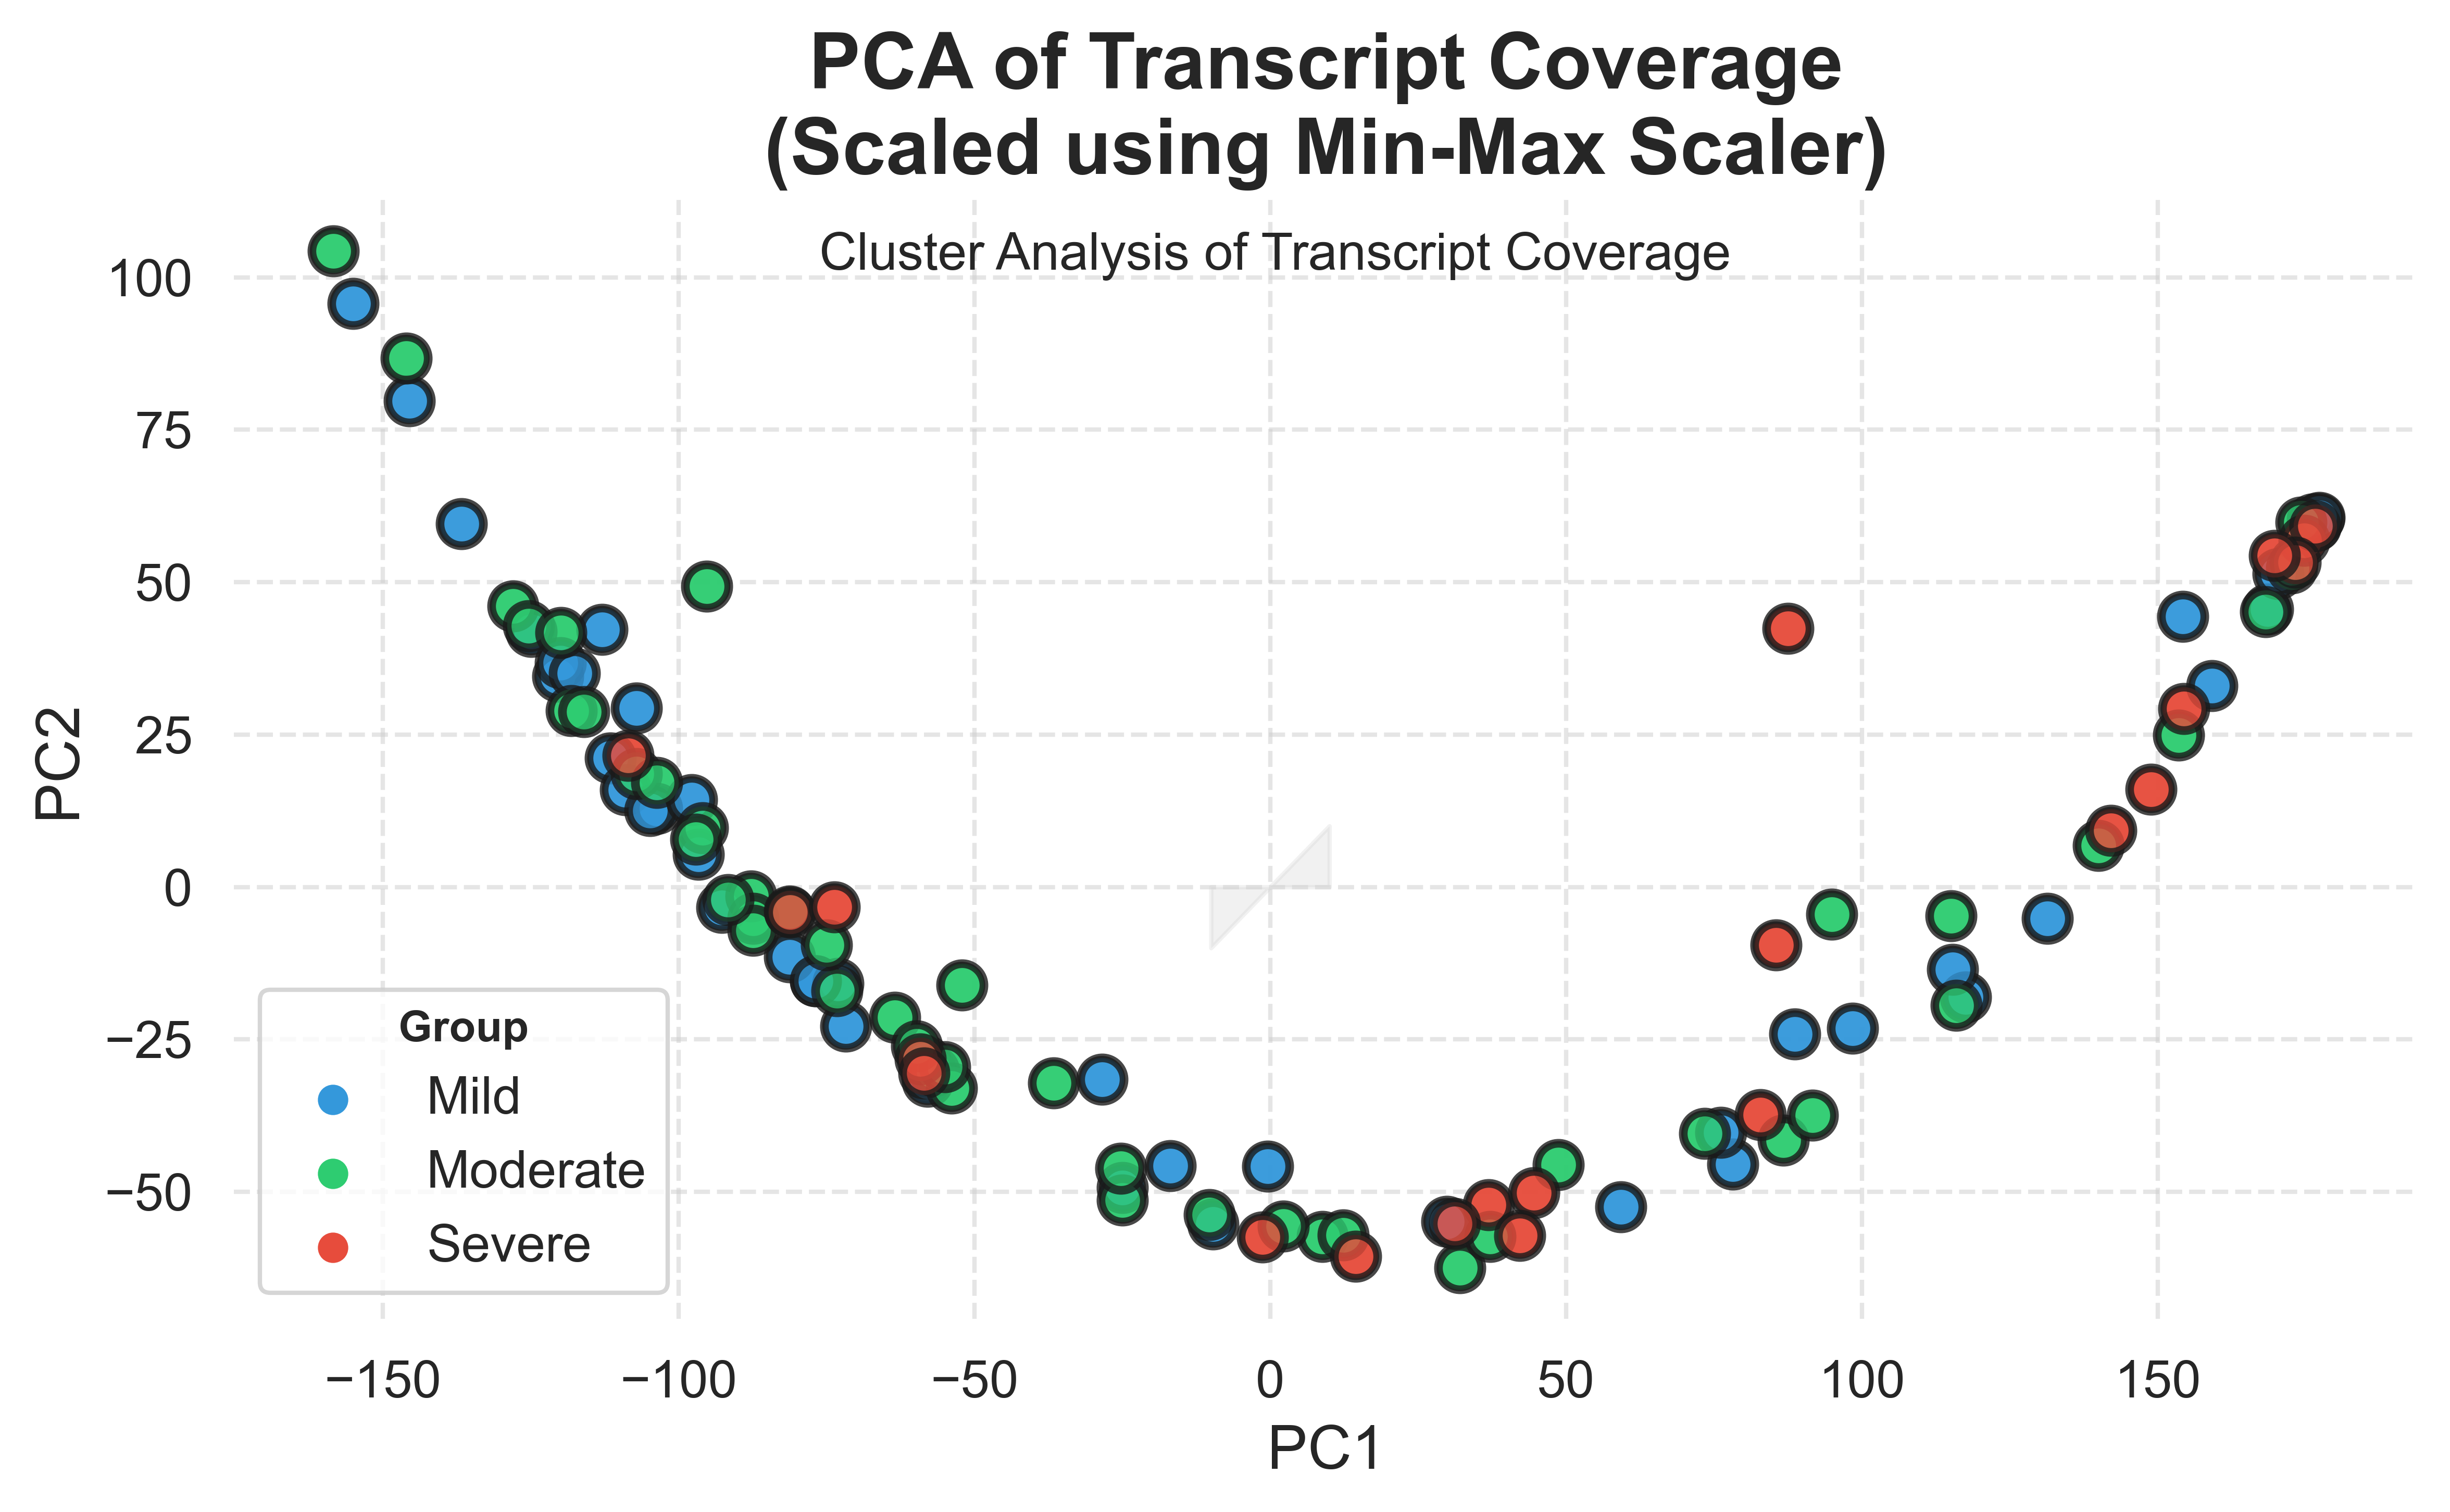

Scaling Strategy: Min-Max Scaler
Top 50 Features Contributing to PC1: ['ENST00000486698', 'ENST00000557496', 'ENST00000556541', 'ENST00000422234', 'ENST00000487701', 'ENST00000574736', 'ENST00000488032', 'ENST00000468891', 'ENST00000492702', 'ENST00000462496', 'ENST00000594558', 'ENST00000484492', 'ENST00000611215', 'ENST00000364014', 'ENST00000585286', 'ENST00000464508', 'ENST00000479096', 'ENST00000486974', 'ENST00000581409', 'ENST00000582095', 'ENST00000577836', 'ENST00000584977', 'ENST00000497787', 'ENST00000428378', 'ENST00000474032', 'ENST00000480714', 'ENST00000414079', 'ENST00000619606', 'ENST00000572704', 'ENST00000474167', 'ENST00000564885', 'ENST00000571547', 'ENST00000492873', 'ENST00000473493', 'ENST00000523579', 'ENST00000611346', 'ENST00000472345', 'ENST00000455053', 'ENST00000558103', 'ENST00000616392', 'ENST00000556942', 'ENST00000691732', 'ENST00000690775', 'ENST00000510448', 'ENST00000561160', 'ENST00000461608', 'ENST00000560450', 'ENST00000522640', 'ENST00000561512'

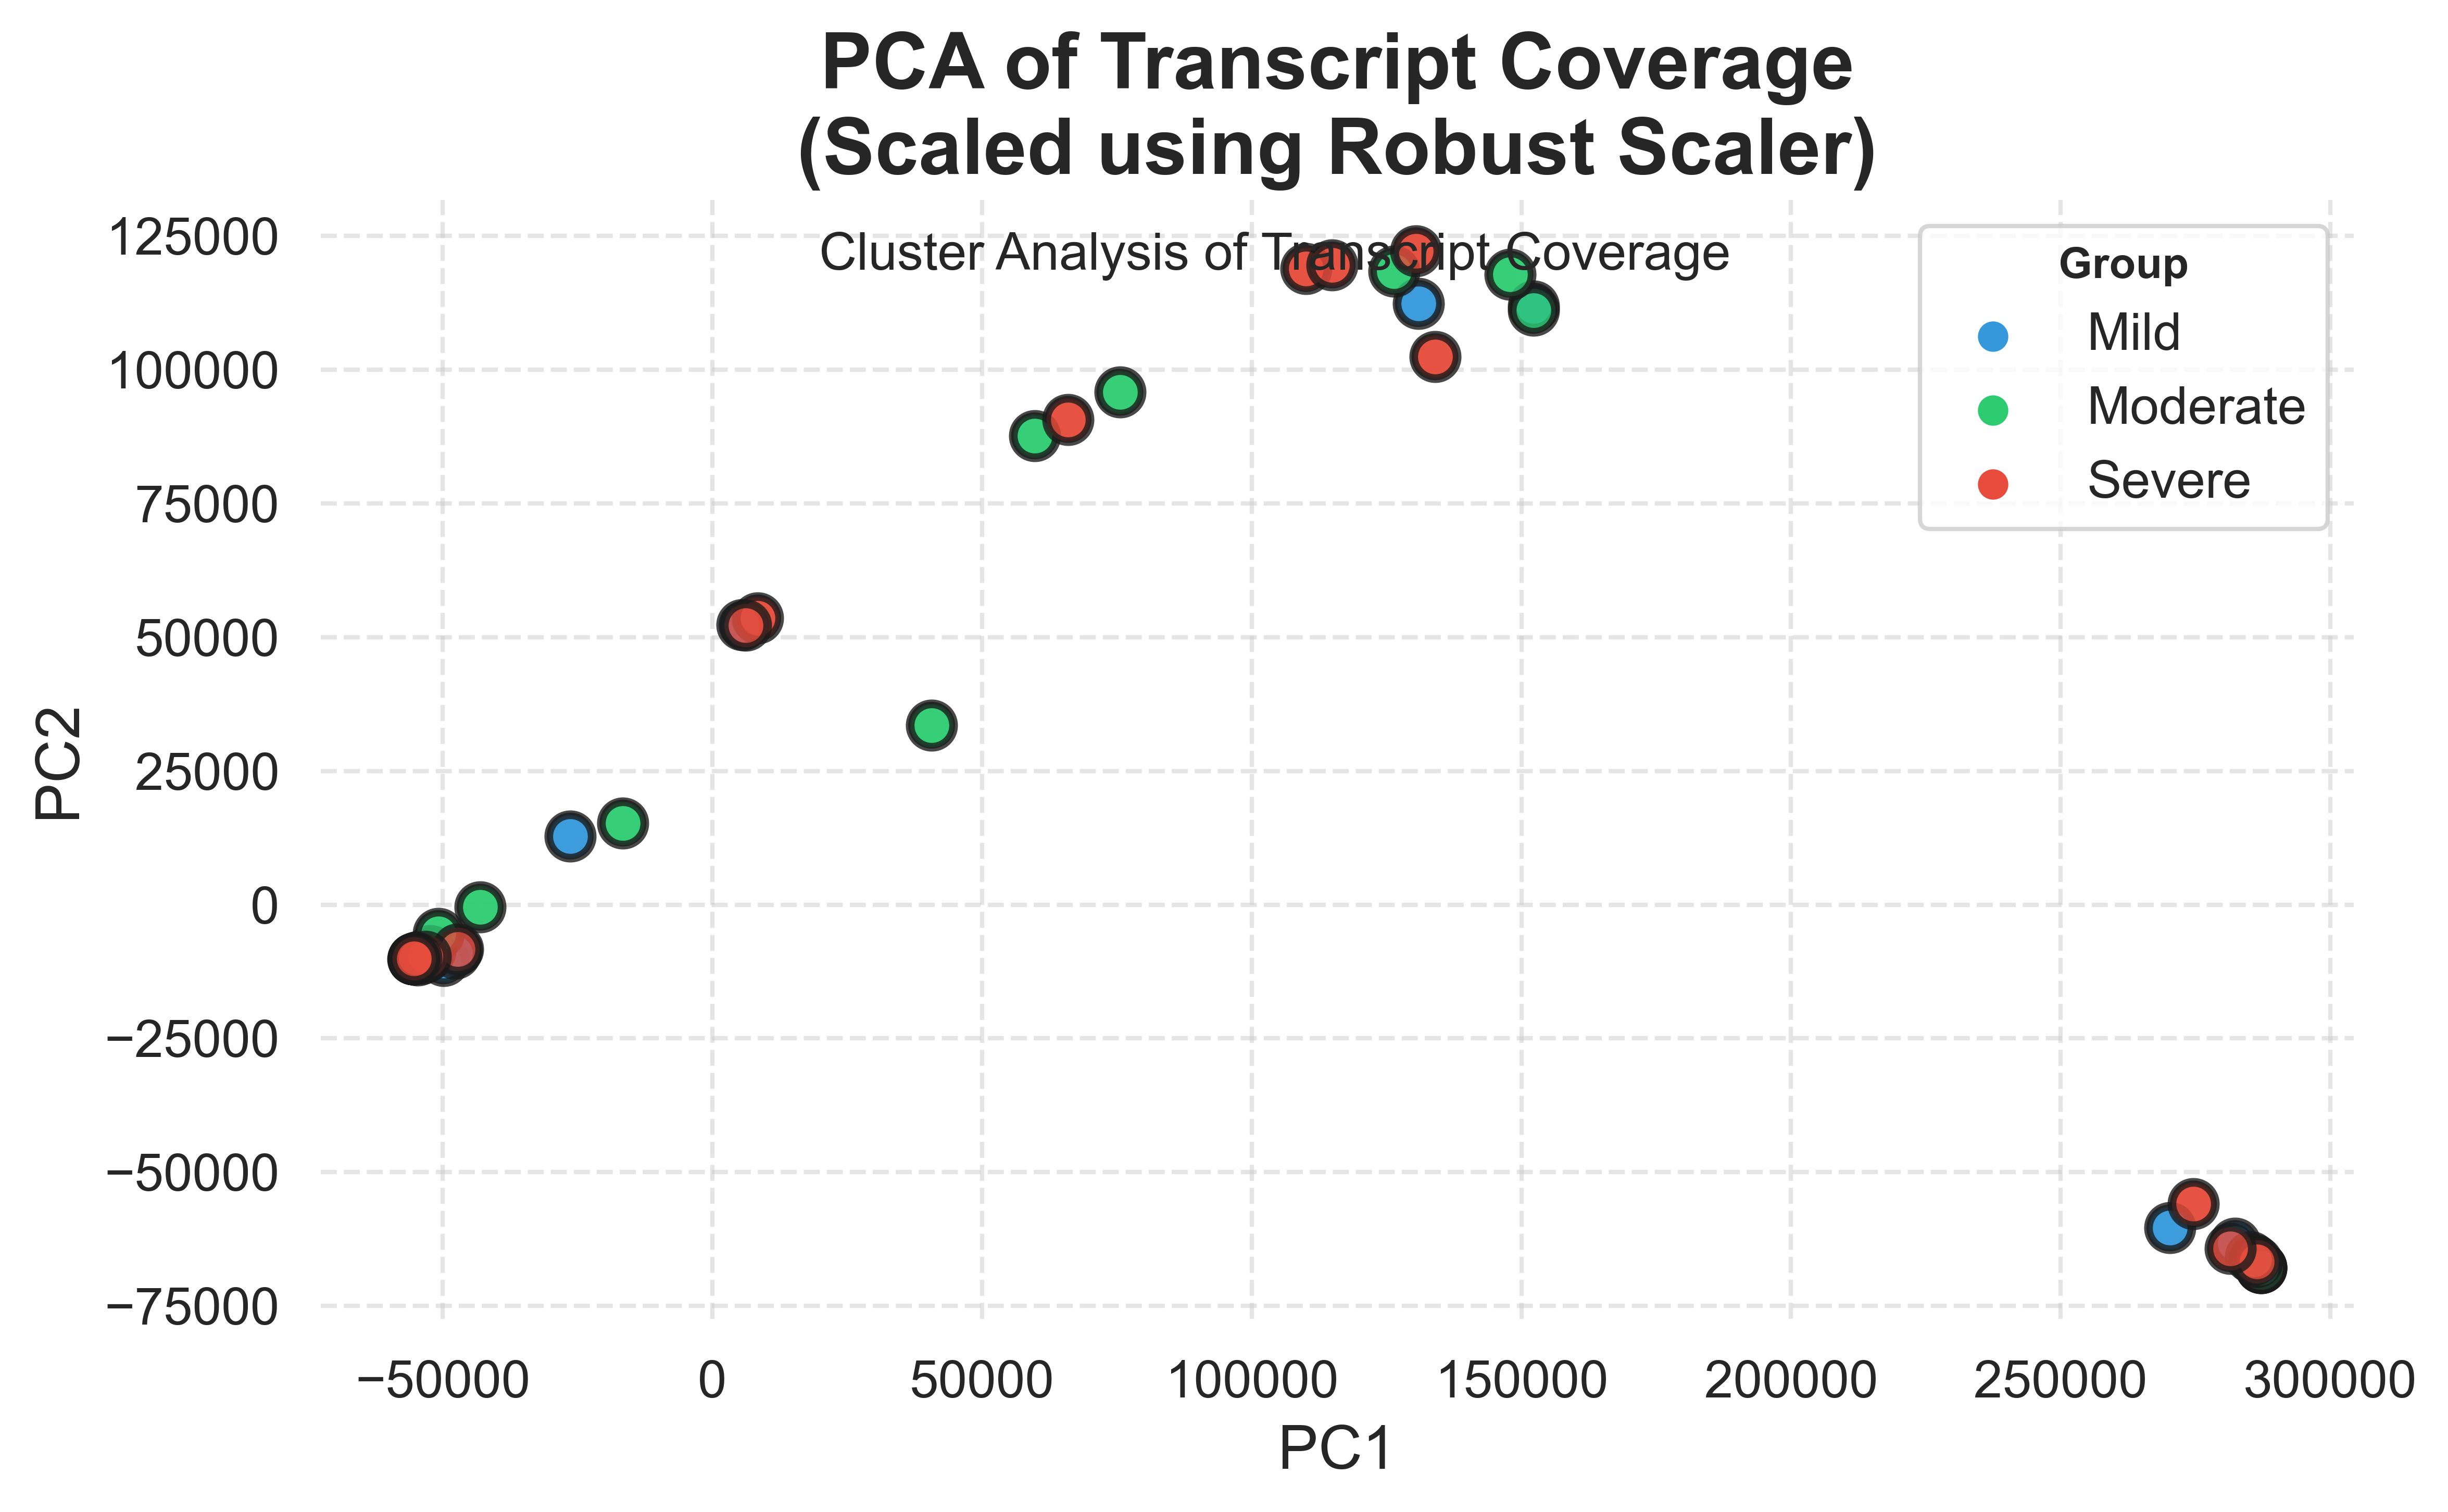

Scaling Strategy: Robust Scaler
Top 50 Features Contributing to PC1: ['ENST00000548524', 'ENST00000637533', 'ENST00000512665', 'ENST00000428691', 'ENST00000511185', 'ENST00000642293', 'ENST00000409915', 'ENST00000697136', 'ENST00000520642', 'ENST00000578918', 'ENST00000700484', 'ENST00000593447', 'ENST00000569429', 'ENST00000552080', 'ENST00000587824', 'ENST00000631024', 'ENST00000510510', 'ENST00000473135', 'ENST00000496462', 'ENST00000508546', 'ENST00000563842', 'ENST00000397378', 'ENST00000675025', 'ENST00000549443', 'ENST00000697797', 'ENST00000567382', 'ENST00000528729', 'ENST00000511892', 'ENST00000635420', 'ENST00000468612', 'ENST00000627006', 'ENST00000677362', 'ENST00000679194', 'ENST00000477413', 'ENST00000556112', 'ENST00000511180', 'ENST00000681634', 'ENST00000558522', 'ENST00000704039', 'ENST00000541380', 'ENST00000677184', 'ENST00000547440', 'ENST00000678852', 'ENST00000373389', 'ENST00000513989', 'ENST00000455131', 'ENST00000557774', 'ENST00000491987', 'ENST00000553581',

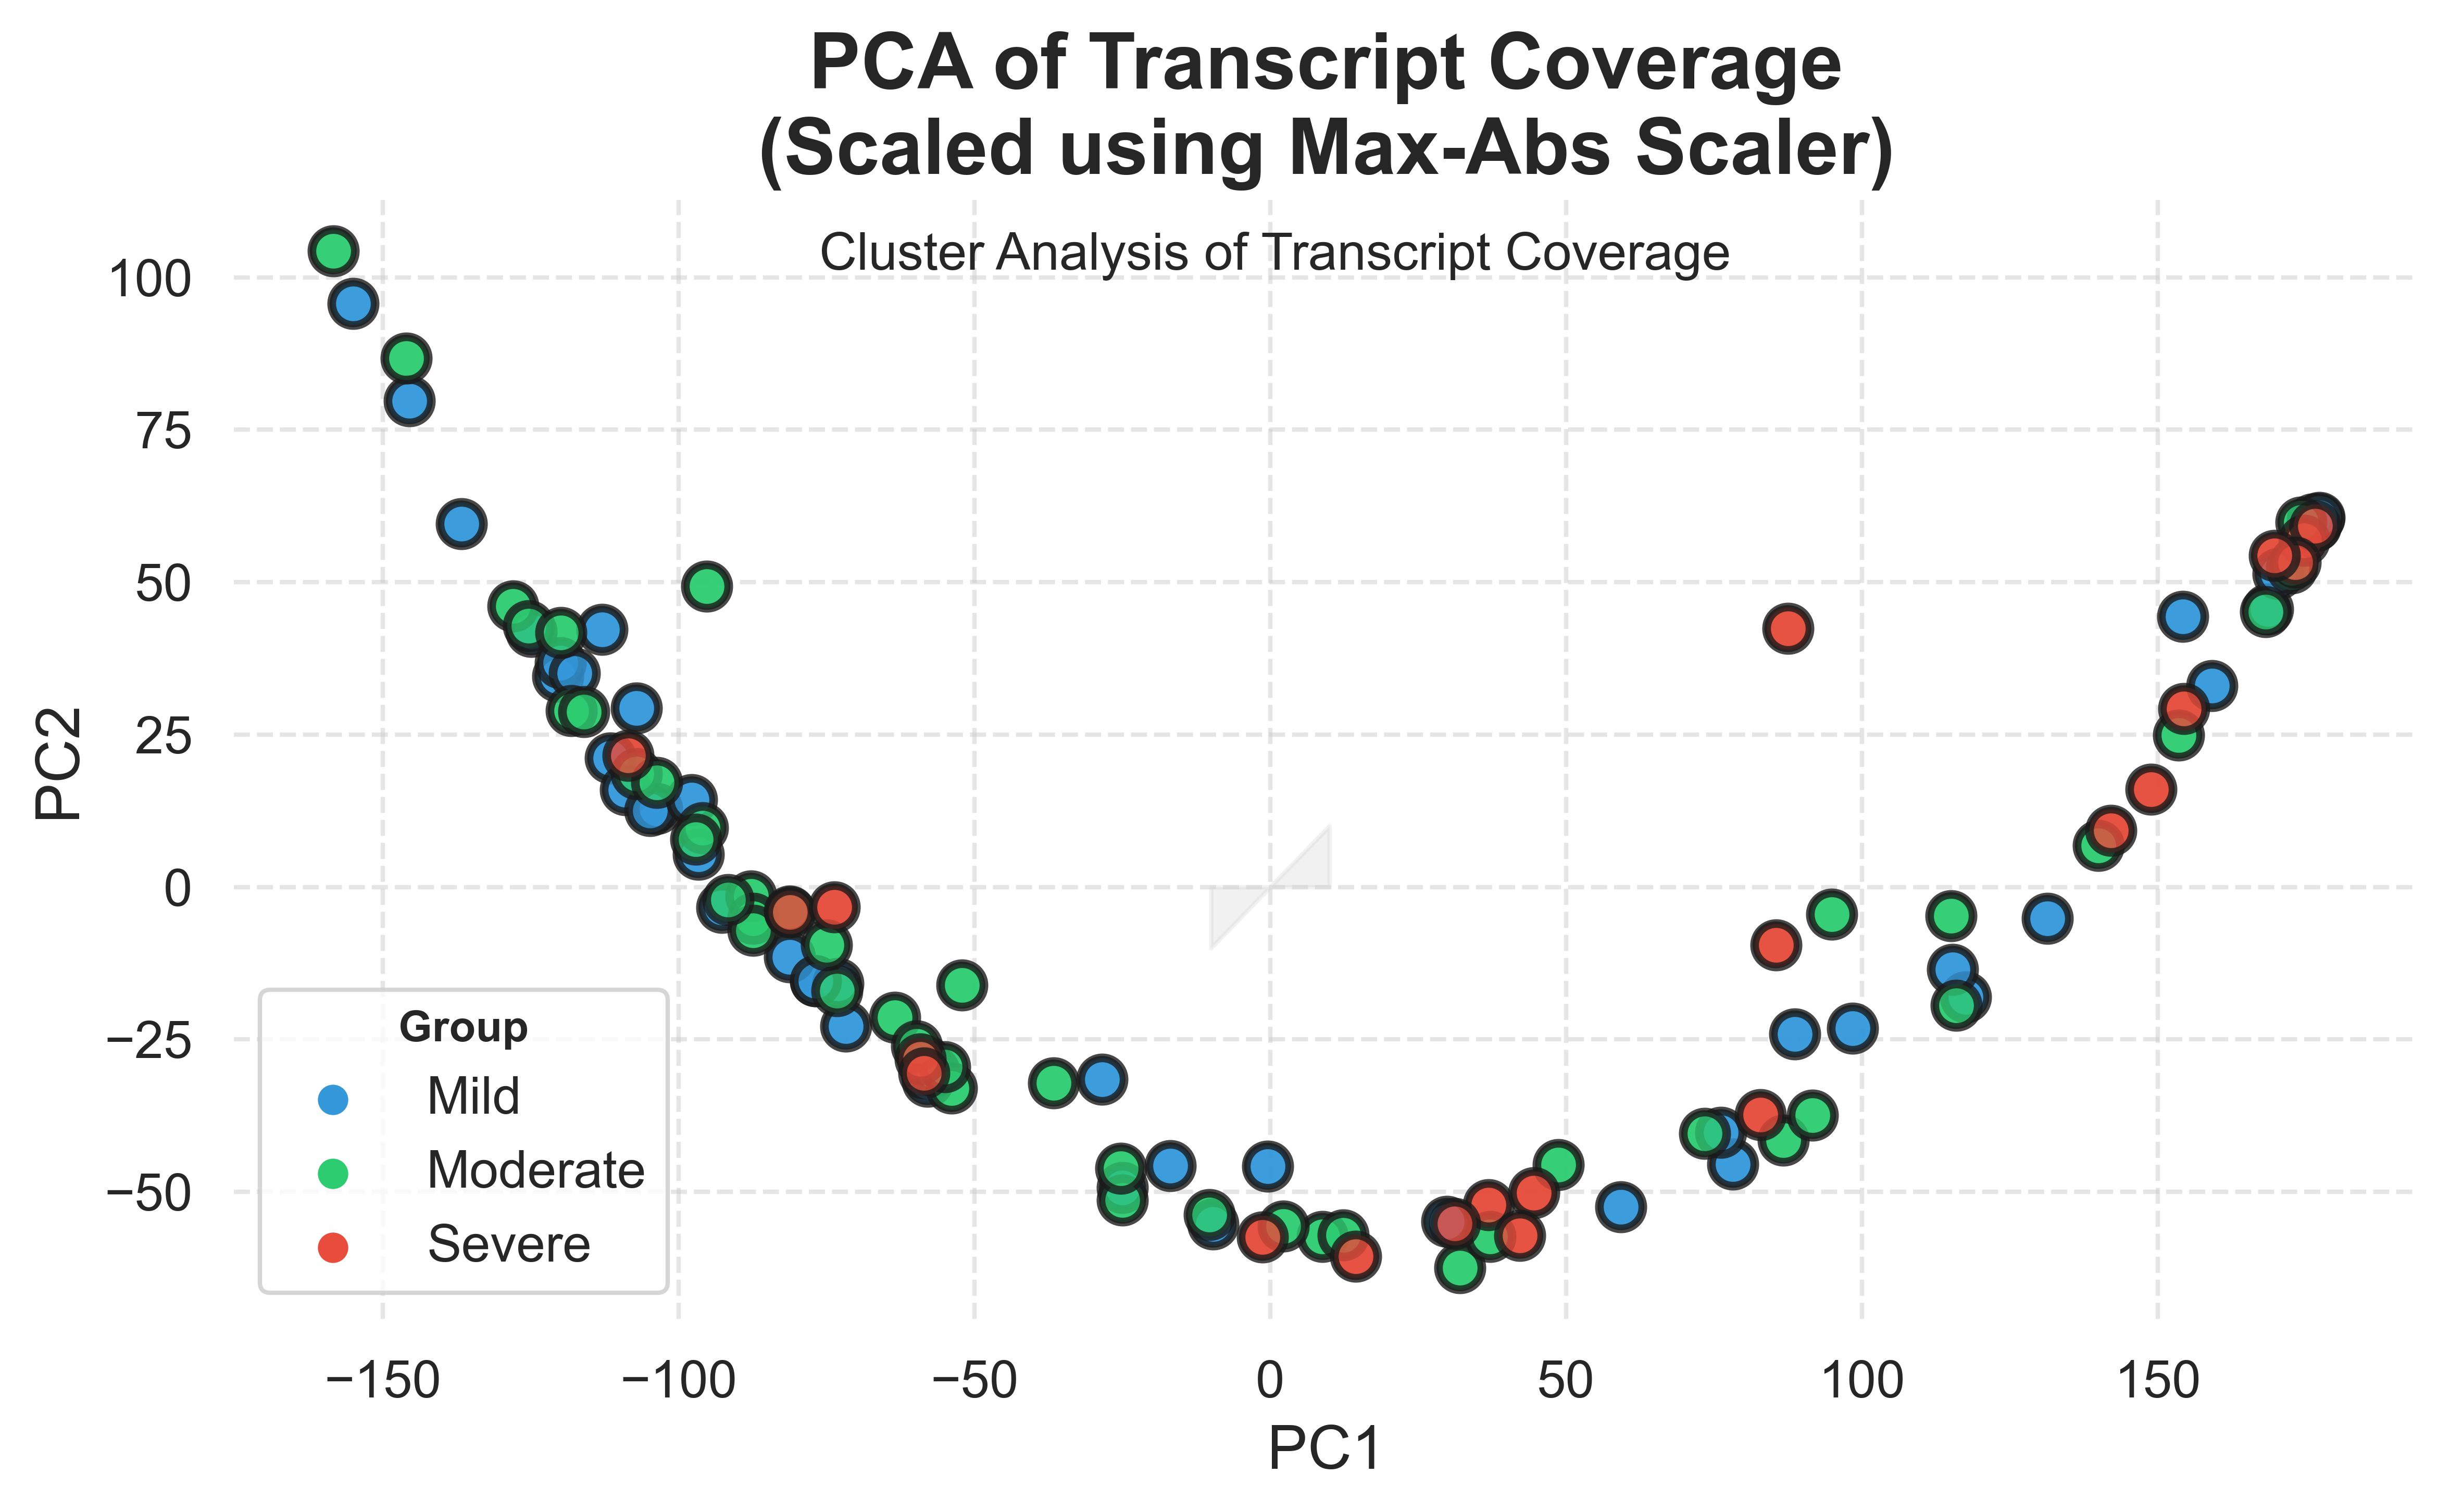

Scaling Strategy: Max-Abs Scaler
Top 50 Features Contributing to PC1: ['ENST00000486698', 'ENST00000557496', 'ENST00000556541', 'ENST00000422234', 'ENST00000487701', 'ENST00000574736', 'ENST00000488032', 'ENST00000468891', 'ENST00000492702', 'ENST00000462496', 'ENST00000594558', 'ENST00000484492', 'ENST00000611215', 'ENST00000364014', 'ENST00000585286', 'ENST00000464508', 'ENST00000479096', 'ENST00000486974', 'ENST00000581409', 'ENST00000582095', 'ENST00000577836', 'ENST00000584977', 'ENST00000497787', 'ENST00000428378', 'ENST00000474032', 'ENST00000480714', 'ENST00000414079', 'ENST00000619606', 'ENST00000572704', 'ENST00000474167', 'ENST00000564885', 'ENST00000571547', 'ENST00000492873', 'ENST00000473493', 'ENST00000523579', 'ENST00000611346', 'ENST00000472345', 'ENST00000455053', 'ENST00000558103', 'ENST00000616392', 'ENST00000556942', 'ENST00000691732', 'ENST00000690775', 'ENST00000510448', 'ENST00000561160', 'ENST00000461608', 'ENST00000560450', 'ENST00000522640', 'ENST00000561512'

C:\python311\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


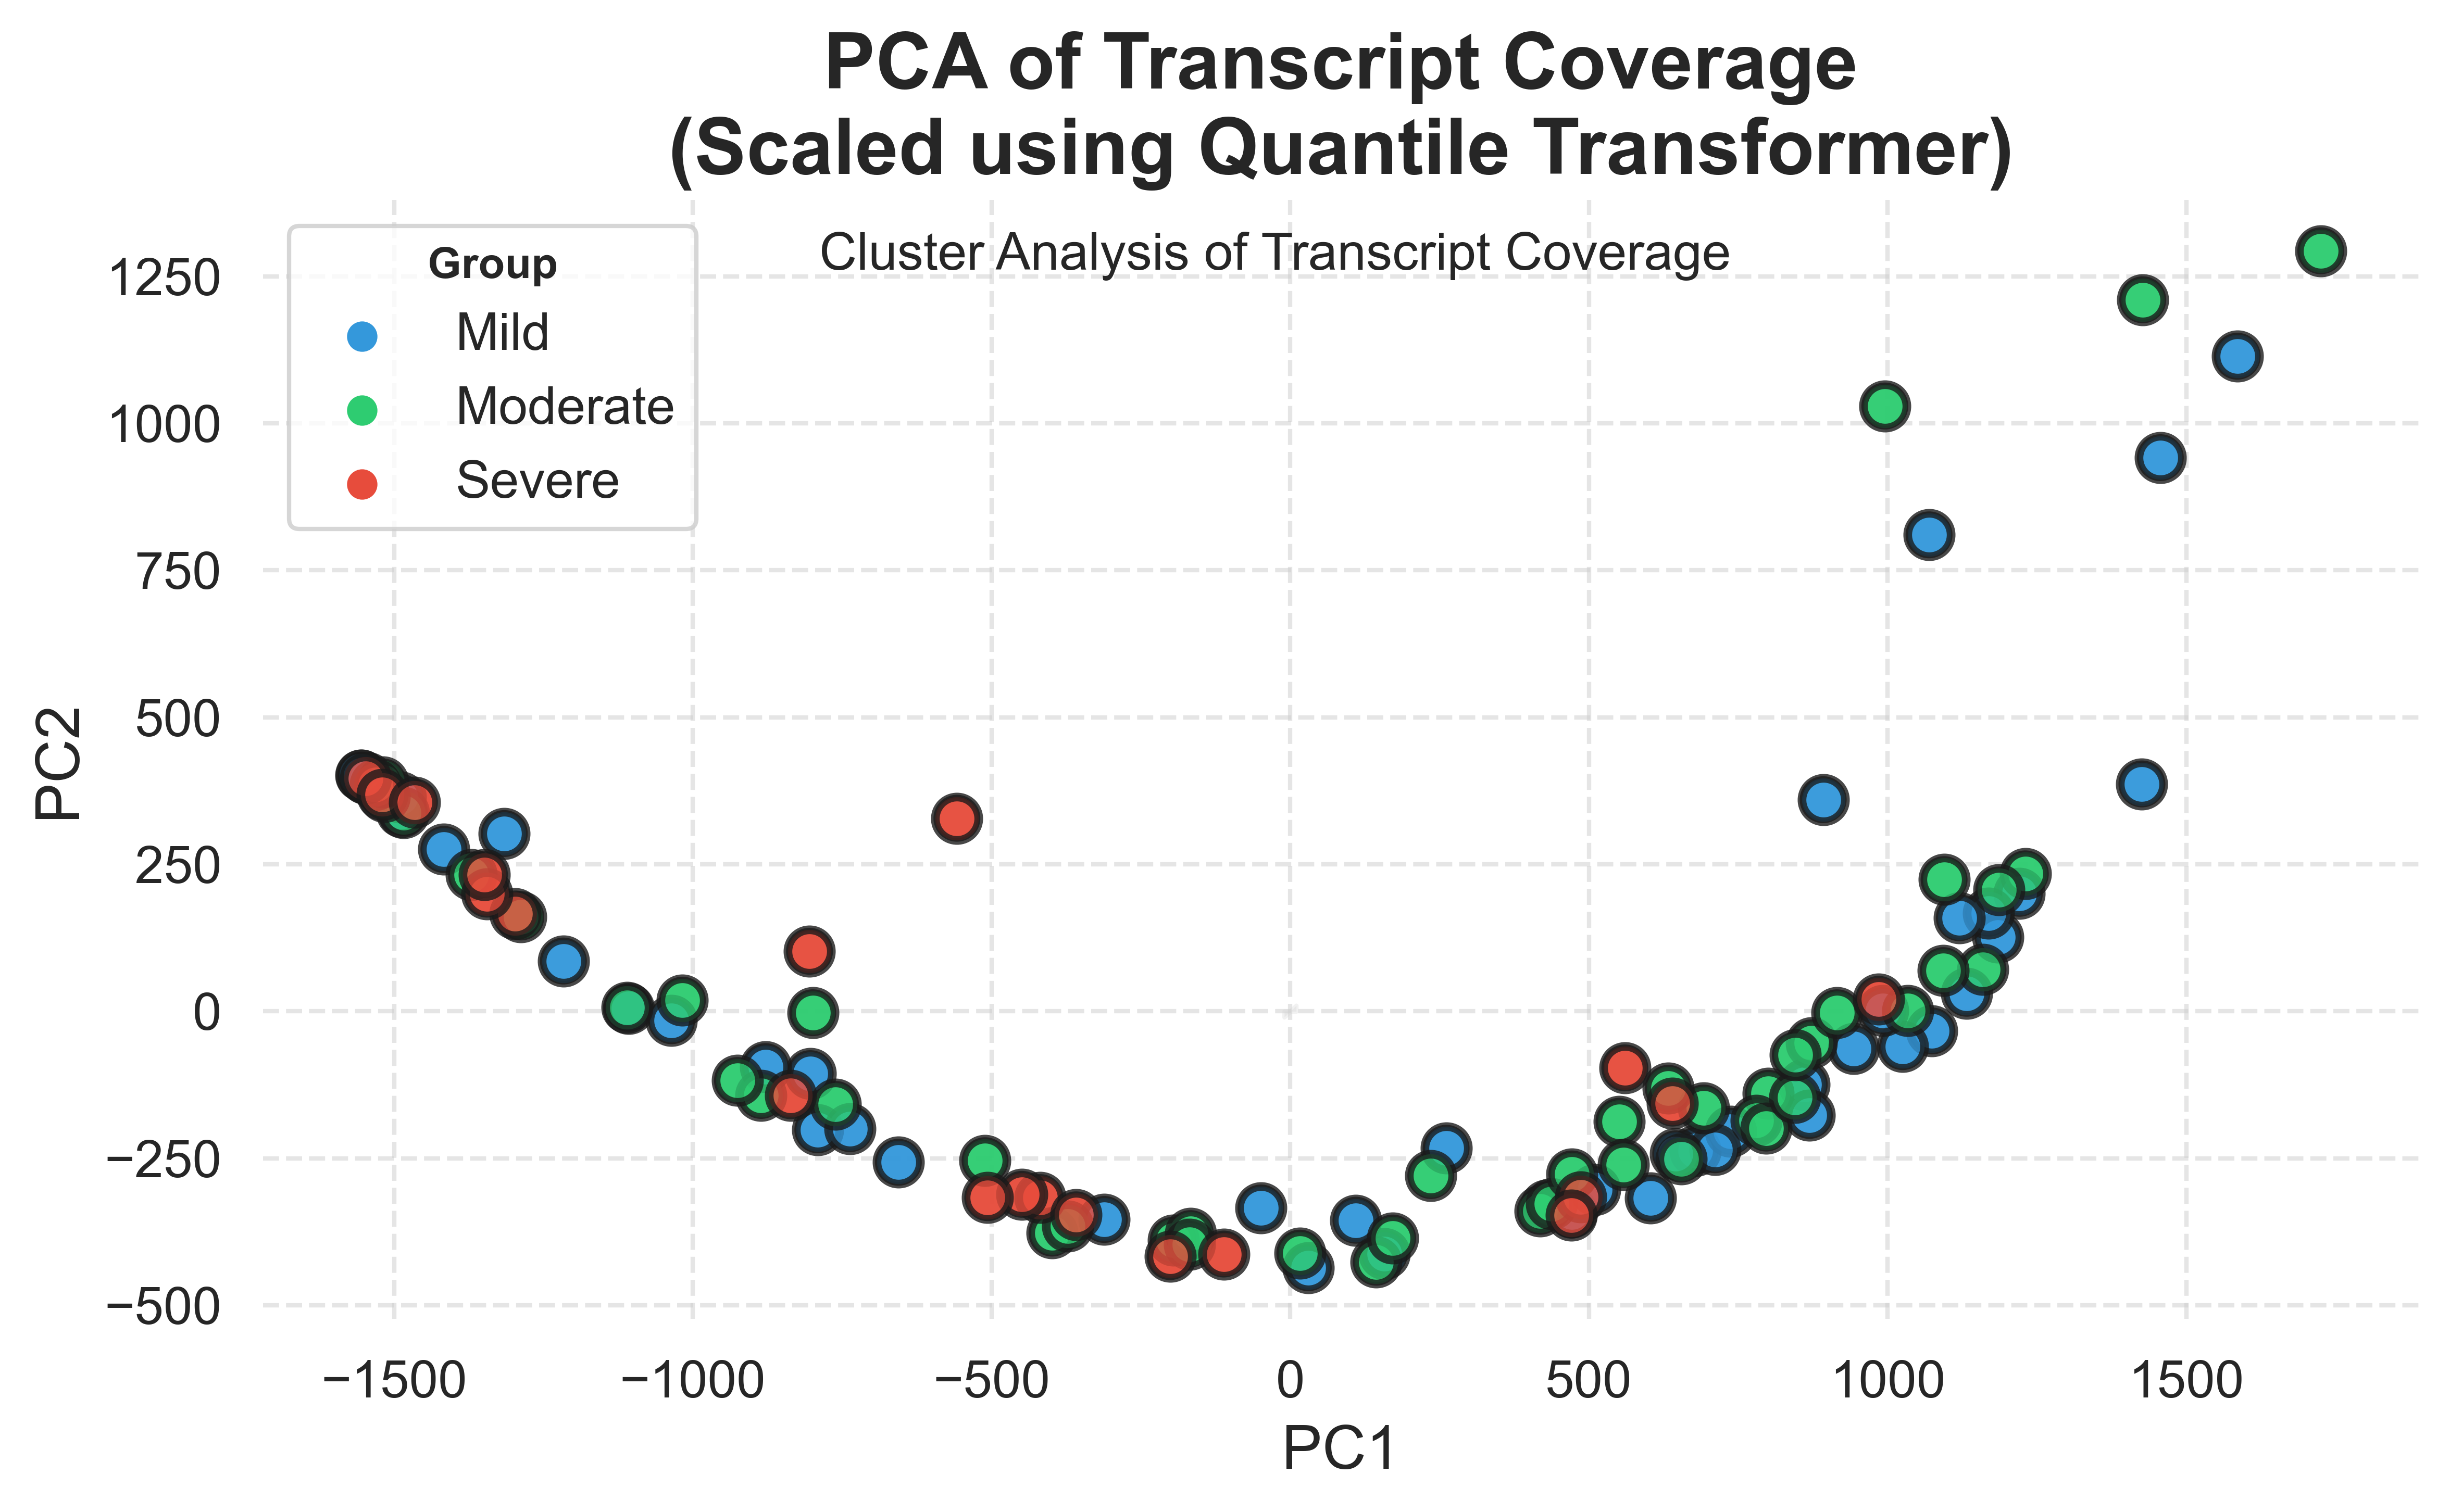

Scaling Strategy: Quantile Transformer
Top 50 Features Contributing to PC1: ['ENST00000486698', 'ENST00000557496', 'ENST00000556541', 'ENST00000488032', 'ENST00000594558', 'ENST00000468891', 'ENST00000464508', 'ENST00000479096', 'ENST00000364014', 'ENST00000486974', 'ENST00000585286', 'ENST00000506942', 'ENST00000602722', 'ENST00000679337', 'ENST00000474167', 'ENST00000428378', 'ENST00000619606', 'ENST00000611215', 'ENST00000607877', 'ENST00000480714', 'ENST00000487701', 'ENST00000497681', 'ENST00000611346', 'ENST00000621419', 'ENST00000414079', 'ENST00000456502', 'ENST00000621186', 'ENST00000528147', 'ENST00000564885', 'ENST00000522640', 'ENST00000616257', 'ENST00000459650', 'ENST00000558103', 'ENST00000559339', 'ENST00000586875', 'ENST00000477882', 'ENST00000487951', 'ENST00000459077', 'ENST00000621478', 'ENST00000467451', 'ENST00000560450', 'ENST00000621121', 'ENST00000459374', 'ENST00000584249', 'ENST00000531175', 'ENST00000390787', 'ENST00000677870', 'ENST00000513820', 'ENST000006

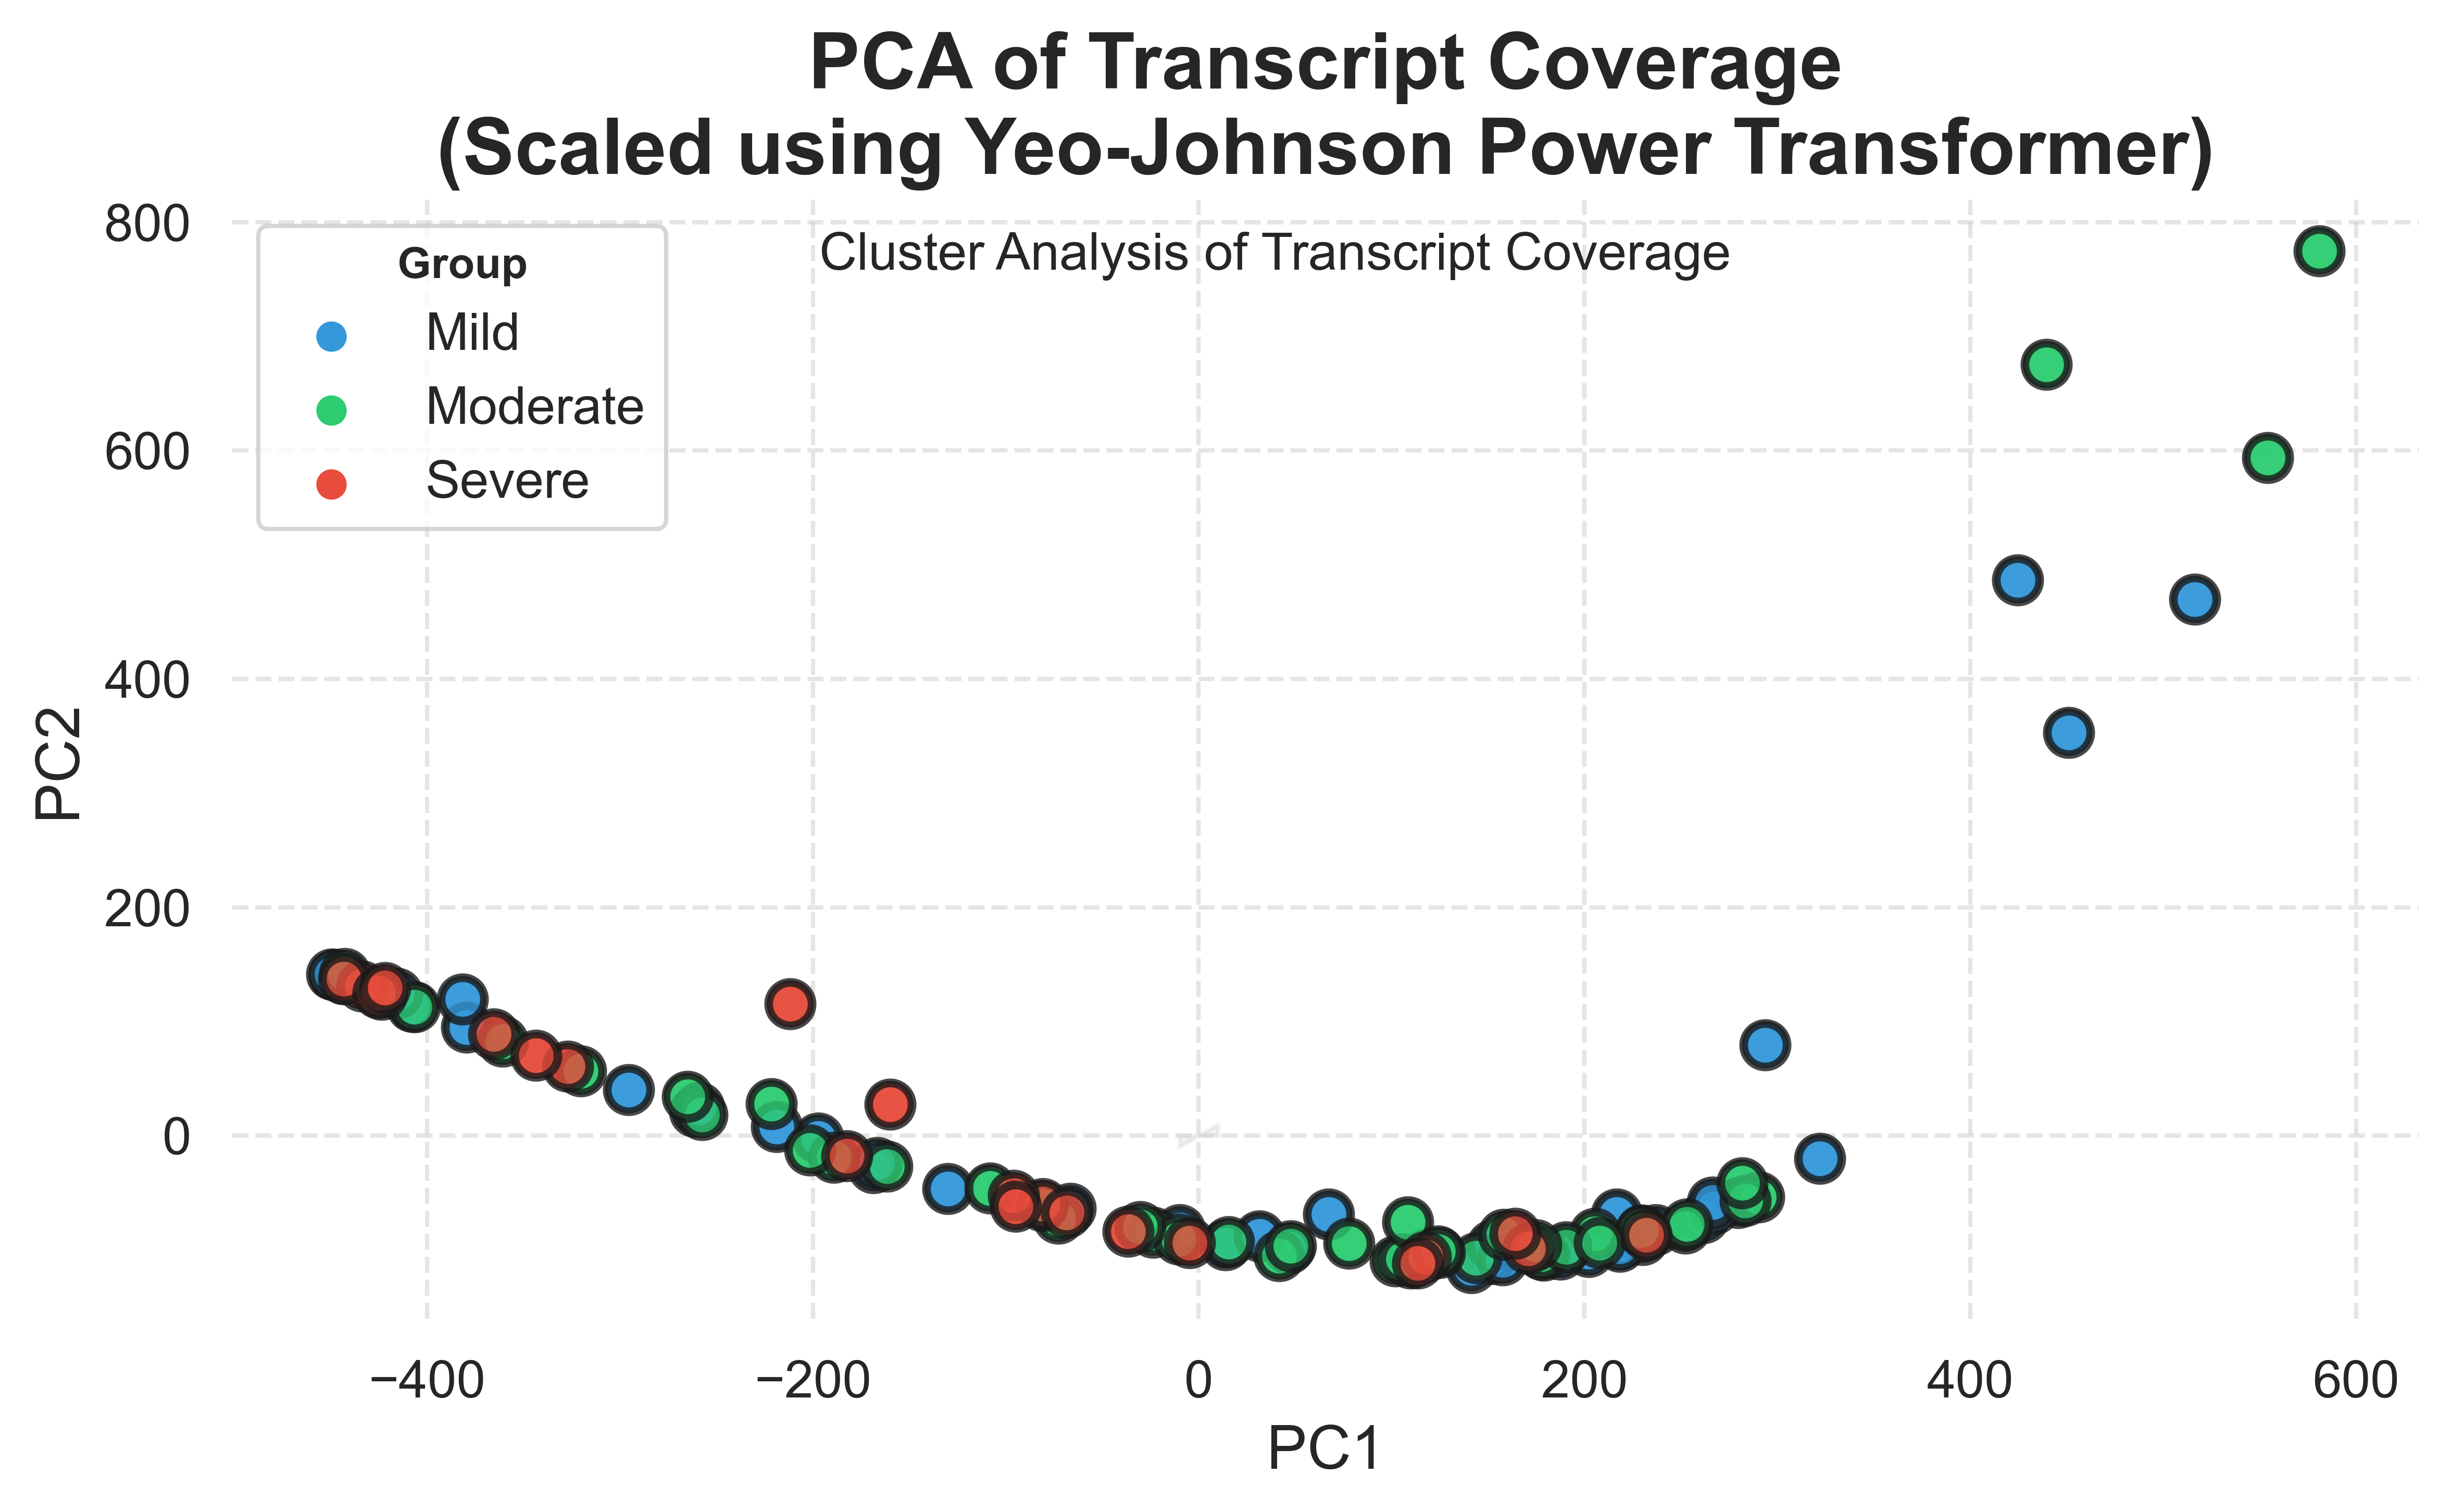

Scaling Strategy: Yeo-Johnson Power Transformer
Top 50 Features Contributing to PC1: ['ENST00000681193', 'ENST00000673706', 'ENST00000680815', 'ENST00000679086', 'ENST00000488118', 'ENST00000678148', 'ENST00000562258', 'ENST00000556239', 'ENST00000677548', 'ENST00000677163', 'ENST00000574894', 'ENST00000678080', 'ENST00000372862', 'ENST00000676523', 'ENST00000677244', 'ENST00000678980', 'ENST00000677609', 'ENST00000470443', 'ENST00000678287', 'ENST00000679246', 'ENST00000678625', 'ENST00000677006', 'ENST00000689322', 'ENST00000395652', 'ENST00000559233', 'ENST00000555759', 'ENST00000397977', 'ENST00000321147', 'ENST00000358939', 'ENST00000698500', 'ENST00000397873', 'ENST00000636836', 'ENST00000652287', 'ENST00000636293', 'ENST00000282344', 'ENST00000651476', 'ENST00000491773', 'ENST00000494399', 'ENST00000246337', 'ENST00000478110', 'ENST00000415005', 'ENST00000691224', 'ENST00000409245', 'ENST00000685322', 'ENST00000558907', 'ENST00000389120', 'ENST00000482173', 'ENST00000459908', 'E

In [8]:
scaled_data = pca_2d_with_scaling(df)


In [9]:
standard           = scaled_data[0]
MinMaxScaler        = scaled_data[1]
RobustScaler        = scaled_data[2]
MaxAbsScaler        = scaled_data[3]
QuantileTransformer = scaled_data[4]
PowerTransformer    = scaled_data[5]

In [10]:
def train_model(df):
    df = df.reset_index()
    df = df.drop(['index'], axis = 1)
    target = pd.DataFrame(df['Group'])
    feature = df.drop(['Group'], axis = 1 )
    enc=ce.OneHotEncoder().fit(target.Group.astype(str))
    y_onehot=enc.transform(target.Group.astype(str))
    target = y_onehot.rename(columns = {
        'Group_1':'mild',
        'Group_2':'moderate',
        'Group_3':'severe'
        })
    X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size = 0.2, 
                                                     shuffle = True,random_state = 42)
    X_train = X_train.reset_index().drop(['index'], axis =1  )
    X_test = X_test.reset_index().drop(['index'], axis =1  )
    y_train = y_train.reset_index().drop(['index'], axis =1  )
    y_test = y_test.reset_index().drop(['index'], axis =1  )
    

    model = MultiOutputClassifier(RandomForestClassifier())
    model = model.fit(X_train, y_train.values)
    y_hat = model.predict(X_test)
    cols = y_train.columns
    
    acc_dict = dict.fromkeys(cols)
    cnf_dict = dict.fromkeys(cols)
    pre_dict = dict.fromkeys(cols)
    rec_dict = dict.fromkeys(cols)
    i = 0
    for k in acc_dict.keys():
        acc_dict[k] = accuracy_score(y_test.values[:,i], y_hat[:,i])
        cnf_dict[k] = metrics.confusion_matrix(y_test.values[:,i], y_hat[:,i])
        pre_dict[k] = metrics.precision_score(y_test.values[:,i], y_hat[:,i], average = "weighted")
        rec_dict[k] = metrics.recall_score(y_test.values[:,i], y_hat[:,i], average = "weighted")
        i += 1

    for k in cols[:]:
        print(k)
        print(f"Accuracy: {acc_dict[k]}, Precision: {pre_dict[k]}, Recall: {rec_dict[k]}")
        print(cnf_dict[k])
        
    plt.figure()
    ax = plt.axes()

    temp = ['mild', 'moderate', 'severe']
    for i in range(y_test.shape[1]):
        if cols[i] in temp:
            roc = metrics.RocCurveDisplay.from_predictions(y_test.values[:,i],
                                                           y_hat[:,i], 
                                                           ax = ax,
                                                           name=cols[i])
    plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
    plt.show()
    
    
    
    return None
    

In [ ]:
train_model(standard)       

In [ ]:
train_model(MinMaxScaler )      

In [ ]:
train_model(RobustScaler )      